In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import pandas as pd
from sklearn.linear_model import LinearRegression
import GPy

In [2]:
#fonts for matplotlib plots
nice_fonts = {"text.usetex": True,
            "font.family": "serif",
            "font.serif" : "Times New Roman"}
plt.rcParams.update(nice_fonts)

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

## Gaussian distribution

In [4]:
def gauss(mu, variance):
    sigma = math.sqrt(variance)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma)
    return x,y

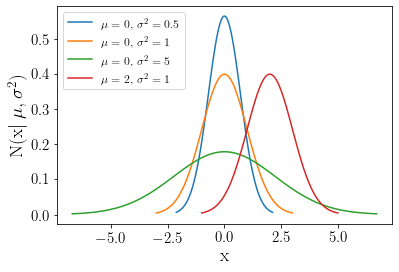

In [5]:
plt.plot(gauss(0,0.5)[0], gauss(0,0.5)[1], label = (r'$\mu=0$, $\sigma^2=0.5$'))
plt.plot(gauss(0,1)[0], gauss(0,1)[1], label = (r'$\mu=0$, $\sigma^2=1$'))
plt.plot(gauss(0,5)[0], gauss(0,5)[1], label = (r'$\mu=0$, $\sigma^2=5$'))
plt.plot(gauss(2,1)[0], gauss(2,1)[1], label = (r'$\mu=2$, $\sigma^2=1$'))
plt.legend(fontsize = 12)
plt.xlabel('x', fontsize=19)
plt.ylabel(r'N(x$\mid\mu, \sigma^2$)', fontsize=19)
plt.savefig('/Users/anamaria/Desktop/normal_distribution.pdf',format = 'pdf', dpi=300, bbox_inches = 'tight' )

## Load example dataset

In [6]:
pop = pd.read_csv('/Users/anamaria/Desktop/Desktop/population.csv')
pop['date'] = [int(pop['date'][i].split('/')[2]) for i in range(len(pop))]
pop.columns = ['date', 'population']
x = pop[39:70]['date']
y = pop[39:70]['population']

In [7]:
X = np.array(x)[:,None]
Y = np.array(y)[:,None]

Plot the data.

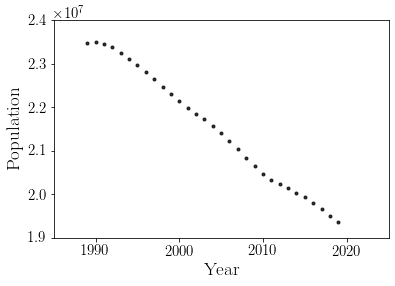

In [26]:
plt.plot(x, y, color='black', marker='o', markersize = 3, alpha=0.8, ls = '')
plt.xlim(1985,2025)
plt.ylim(1.9*10**7, 2.4*10**7)
plt.xlabel('Year', fontsize= 19)
plt.ylabel('Population', fontsize= 19)
plt.savefig('/Users/anamaria/Desktop/population.pdf',format = 'pdf', dpi=200, bbox_inches = 'tight' )

## Linear regression

Try linear regression using sklearn.linear_model.

In [27]:
model = LinearRegression()

In [28]:
model.fit(np.array(x)[:,None],np.array(y)[:,None])

LinearRegression()

Linear function equation: f(x)=w0+w1x, where w0 is the intercept and w1 is the slope gradient.

In [29]:
model.intercept_

array([3.19903526e+08])

In [30]:
model.coef_[0][0]/100000

-1.488924334677419

In [31]:
y_pred = [model.intercept_[0] + model.coef_[0][0]*x_t for x_t in x]

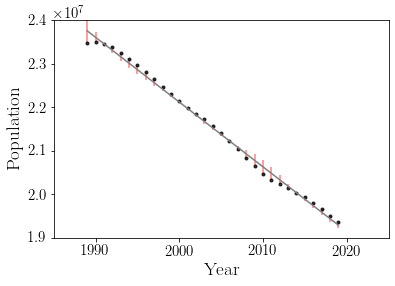

In [19]:
plt.plot(x, y, color='black', marker='o', markersize = 3, alpha=0.8, ls = '' )
plt.errorbar(x, y_pred, yerr=y_pred - y, alpha = 0.5, fmt='o',  color = 'red', marker = '')
plt.plot(x, y_pred, color='grey')
plt.xlim(1985,2025)
plt.ylim(1.9*10**7, 2.4*10**7)
plt.xlabel('Year', fontsize= 19)
plt.ylabel('Population', fontsize= 19)
plt.savefig('/Users/anamaria/Desktop/population_lr.pdf',format = 'pdf', dpi=200, bbox_inches = 'tight' )

In [32]:
tnew1 = model.predict(np.array([2025])[:,None])[0][0]

In [33]:
tnew2 = model.predict(np.array([2030])[:,None])[0][0]

 /Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning:Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


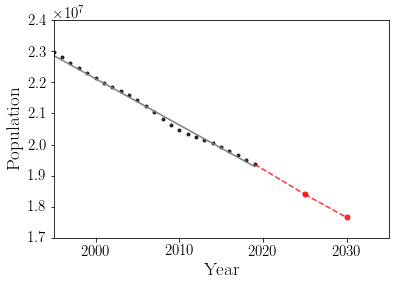

In [34]:
plt.plot(x, y, color='black', marker='o', markersize = 3, alpha=0.8, ls = '')
plt.plot(x, y_pred, color='grey')
plt.plot([x[-1:], 2025],[y[-1:], tnew1],color='red', marker='', ls = '--', fillstyle = 'none', alpha=0.8)  
plt.plot([2025, 2030], [tnew1, tnew2],color='red', marker='o', markersize = 5, alpha=0.8, ls = '--')
plt.xlim(1995,2035)
plt.ylim(1.7*10**7, 2.4*10**7)
plt.xlabel('Year', fontsize= 19)
plt.ylabel('Population', fontsize= 19)
plt.savefig('/Users/anamaria/Desktop/population_lr_pred.pdf',format = 'pdf', dpi=200, bbox_inches = 'tight' )

## Gaussian Process regression

In [4]:
k_lin = GPy.kern.Linear(1)
k_exp = GPy.kern.Exponential(1)

k_rbf = GPy.kern.RBF(input_dim=1, variance=2.25, lengthscale=1.5)
k_mat32 = GPy.kern.Matern32(input_dim=1, variance=2., lengthscale=0.2)
k_mat52 = GPy.kern.Matern52(1)

k_per = GPy.kern.StdPeriodic(1, period=3.)
k_cos = GPy.kern.Cosine(1)
k_brwn = GPy.kern.Brownian(1)
k_nn = GPy.kern.MLP(1, variance = 2.1)

ks = [k_lin, k_rbf, k_nn, k_rbf+k_nn, k_rbf*k_nn]
ks_names = ['Linear', 'RBF', 'MLP', 'RBF+MLP', 'RBF*MLP']

Generate the prior plots for different kernels. Using the sample space from the example data.

In [5]:
# for k, name in zip(ks,ks_names):
#     fig, ax = plt.subplots(1,1)
#     #sample from the kernel
#     sample_space = np.linspace(1989, 2020, 100)[:,None]
#     #sample_space = np.array(y[:,None])
#     mu = np.zeros((len(sample_space)))
#     C = k.K(sample_space)
        
#     # Sample 5 times from a multivariate Gaussian distribution with mean 0 and covariance k(X,X)
#     Z  = np.random.multivariate_normal(mu, C, 5)
#     for i in range(3):
#         plt.plot(sample_space, Z[i])
#     plt.plot(sample_space, mu, '--r', label = 'Function mean')
#     plt.title(name, fontsize = 19)
#     plt.xlabel('x', fontsize = 19)
#     plt.ylabel('f(x)', fontsize = 19)
#     #fig.savefig('/Users/anamaria/Desktop/Desktop/thesis_pictures/'+name+'.pdf', format='pdf', dpi =200, bbox_inches='tight')
#     plt.legend()
#     plt.show()

Generate the posterior plots with different kernels using the example data.

In [6]:
# X_subset =np.array([X[3], X[9],  X[30], X[60]])
# Y_subset = np.array([Y[3]/10**7, Y[9]/10**7,  Y[30]/10**7, Y[60]/10**7])

# # X_subset = np.random.uniform(0, 1., (sample_size, 1))
# # Y_subset = np.sin(X_subset) + np.random.randn(sample_size, 1)*0.05

# print(X_subset, Y_subset)

# kernel = GPy.kern.RBF(input_dim=1, variance=2.25, lengthscale=1.5) 
# model = GPy.models.GPRegression(X_subset,Y_subset,kernel, noise_var=1e-5)
# #model.optimize()

# testX = np.linspace(1950, 2020, 100)[:,None]
# # testX = np.linspace(0,1, 100)[:,None]

# simY, simMse = model.predict(testX)

# i=0
# for i in range(3):
#     posteriorTestY = model.posterior_samples_f(testX, full_cov=True, size=1)
#     plt.plot(testX, posteriorTestY.reshape(-1,1), label = 'Sample from posterior', color = 'grey')
#     i+=1

# plt.plot(X_subset, Y_subset,'ok', markersize=10)
# plt.plot(testX, simY, '--r', label = 'Mean')
# #plt.plot(testX, simY + 3 * simMse ** 0.5, '--g')
# plt.xlabel('x', fontsize = 19)
# plt.ylabel('f(x)', fontsize = 19)
# plt.legend()
# plt.title('Posterior',fontsize = 19)
# #dark grey line marks the current mean of the gp

Generate priors for different kernels using a random sample space.

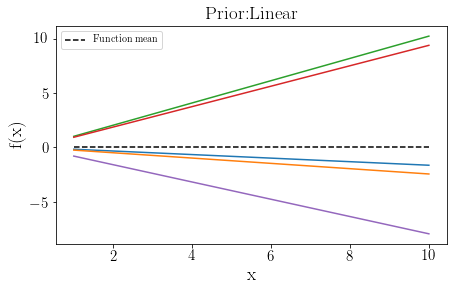

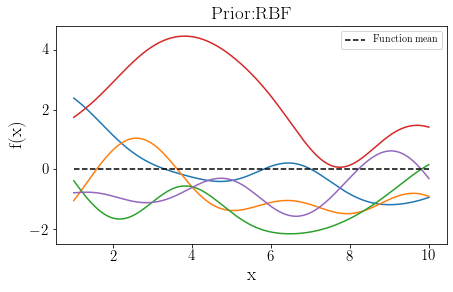

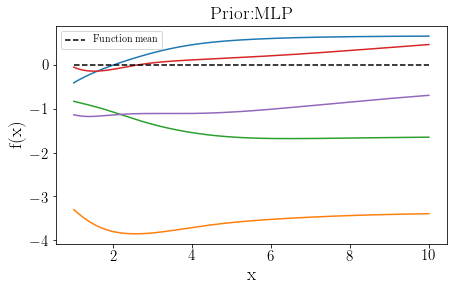

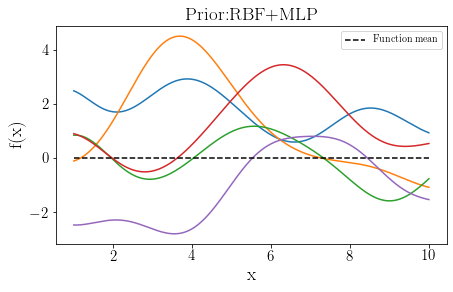

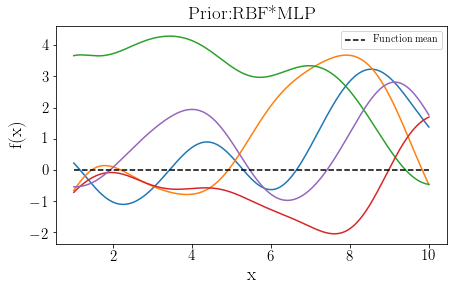

In [7]:
for k, name in zip(ks,ks_names):
    fig, ax = plt.subplots(1,1, figsize = (7,4))
    #sample from the kernel
    sample_space = np.linspace(1, 10, 1000)[:,None]
    #sample_space = np.array(y[:,None])
    mu = np.zeros((len(sample_space)))
    C = k.K(sample_space)
        
    # Sample 5 times from a multivariate Gaussian distribution with mean 0 and covariance k(X,X)
    Z  = np.random.multivariate_normal(mu, C, 5)
    for i in range(5):
        plt.plot(sample_space, Z[i])
    plt.plot(sample_space, mu, '--', color='black', label = 'Function mean')
    plt.title("Prior:"+name, fontsize = 19)
    plt.xlabel('x', fontsize = 19)
    plt.ylabel('f(x)', fontsize = 19)
    plt.legend()
    fig.savefig('/Users/anamaria/Desktop/'+name+'.pdf', format='pdf', dpi =200, bbox_inches='tight')
    
    plt.show()

Generate the posterior plots with different kernels using the random data.

In [14]:
?GPy.kern.MLP

In [186]:
sample_size=15


X_subset = np.random.uniform(1, 5., (sample_size, 1))
Y_subset = np.sin(X_subset) + np.random.randn(sample_size, 1)*0.5
testX = np.linspace(1,10, 100)[:,None]

In [187]:
import GPy
k_rbf = GPy.kern.RBF(input_dim=1, variance=2.25, lengthscale=1.5)
k_nn = GPy.kern.MLP(1, variance =27.5, weight_variance = 0.1, bias_variance = 0.1)
# weight_variance = 20.1,
ks = [ k_rbf, k_nn, k_rbf+k_nn, k_rbf*k_nn]
ks_names = ['RBF', 'MLP', 'RBF+MLP', 'RBF*MLP']

In [188]:
model = GPy.models.GPRegression(X_subset,Y_subset,k_nn)
model.optimize()

In [189]:
model

GP_regression.,value,constraints,priors
mlp.variance,277993.1907750177,+ve,
mlp.weight_variance,1.5194945696009245e-06,+ve,
mlp.bias_variance,1.1802668724150802e-05,+ve,
Gaussian_noise.variance,0.12959356622920434,+ve,


 /Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


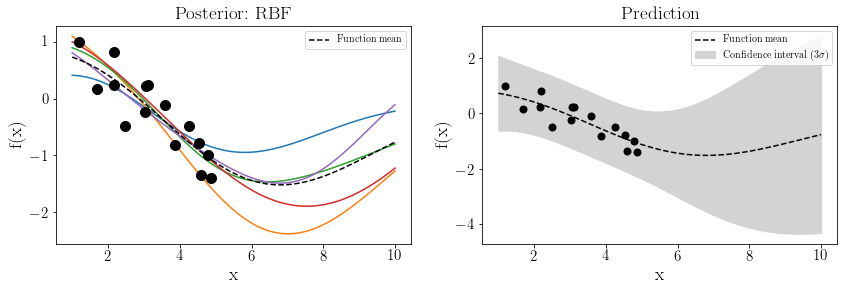

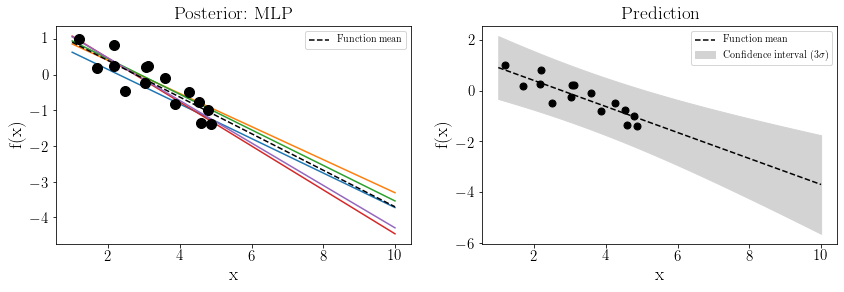

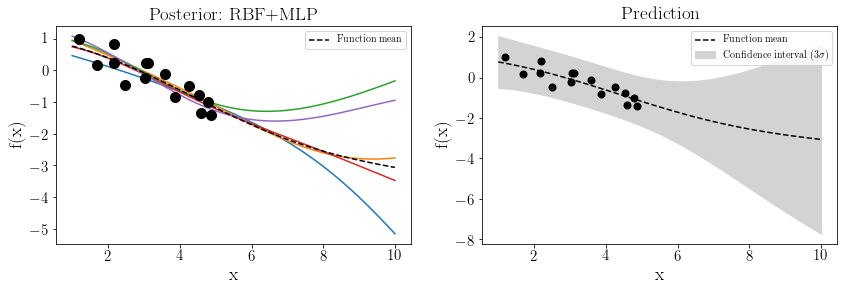

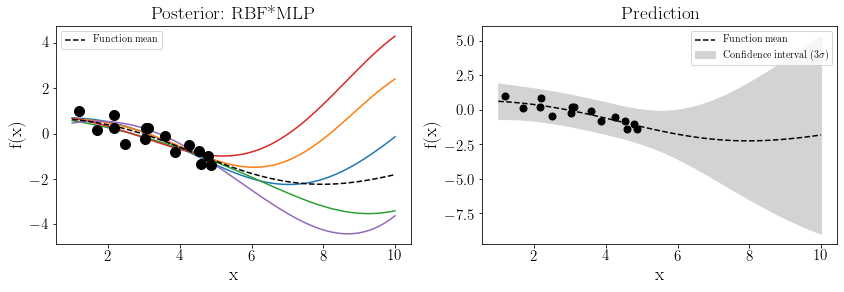

In [190]:
for k,name in zip(ks,ks_names):
    
    model = GPy.models.GPRegression(X_subset,Y_subset,k)
    model.optimize()
    fig,(ax1, ax2) = plt.subplots(1,2,figsize=(14, 4))
    

    simY, simMse = model.predict(testX)

    i=0
    for i in range(5):
        posteriorTestY = model.posterior_samples_f(testX, full_cov=True, size=1)
        ax1.plot(testX, posteriorTestY.reshape(-1,1))
        i+=1

    ax1.plot(X_subset, Y_subset,'ok', markersize=10)
    ax1.plot(testX, simY, '--', color = 'black', label = 'Function mean')
    
    ax1.set_xlabel('x', fontsize = 19)
    ax1.set_ylabel('f(x)', fontsize = 19)
    ax1.set_title('Posterior: '+name,fontsize = 19)
    ax1.legend()
    extent = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig('/Users/anamaria/Desktop/'+name+'_posterior2.pdf', format='pdf', dpi =200, bbox_inches=extent)
    
#     ax1.savefig('/Users/anamaria/Desktop/'+name+'_post.pdf', format='pdf', dpi =200, bbox_inches='tight')
#     ax1.show()
    
    #dark grey line marks the current mean of the gp
    ax2.plot(X_subset, Y_subset,'ok', markersize=7)
    ax2.plot(testX, simY, '--', color = 'black', label = 'Function mean')
    xi = [t[0] for t in testX]
    y1 = [t[0] for t in (simY + 3 * simMse**0.5 )]
    y2 = [t[0] for t in (simY - 3 * simMse**0.5)]


    ax2.fill_between(xi, y1,y2,color='lightgrey', label = r'Confidence interval (3$\sigma$)')
    ax2.set_xlabel('x', fontsize = 19)
    ax2.set_ylabel('f(x)', fontsize = 19)
    ax2.set_title('Prediction', fontsize = 19)
    ax2.legend()
    fig.savefig('/Users/anamaria/Desktop/'+name+'_posterior2.pdf', format='pdf', dpi =200, bbox_inches='tight')
    #extent2 = ax2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    #fig.savefig('/Users/anamaria/Desktop/'+name+'_posterior_pred.pdf', format='pdf', dpi =200, bbox_inches=extent2)


## Modelling the example data with GPy

 /Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /Users/anamaria/.pyenv/versions/3.8.1/lib/python3.8/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply



Name : GP regression
Objective : -107.79071718832488
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |      2.297488753286733  |      +ve      |        
  rbf.lengthscale          |      8.948453310935182  |      +ve      |        
  Gaussian_noise.variance  |  4.925140725587631e-06  |      +ve      |        


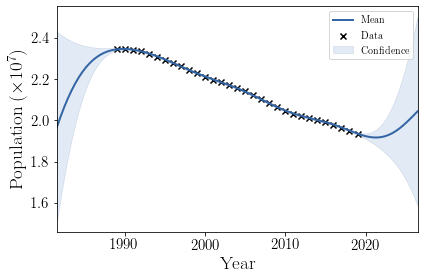

In [32]:
k = GPy.kern.RBF(input_dim=1, variance=0.9, lengthscale=1)
model_new = GPy.models.GPRegression(X,Y/10**7,k)
model_new.constrain_positive('')
model_new.optimize()
model_new.plot()
plt.xlabel('Year', fontsize = 19)
plt.ylabel(r'Population ($\times10^7$)', fontsize = 19)
print(model_new)
plt.savefig('/Users/anamaria/Desktop/population_gp_8.pdf',format = 'pdf', dpi=200, bbox_inches = 'tight')

In [98]:
sigma1 = model_new.posterior_covariance_between_points(X[0][:,None], X[1][:,None])[0][0]

In [99]:
sigma2 = model_new.posterior_covariance_between_points(X[0][:,None], X[30][:,None])[0][0]

In [97]:
print(sigma1, sigma2)

1.1526271594952675e-06 1.94159640032332e-08


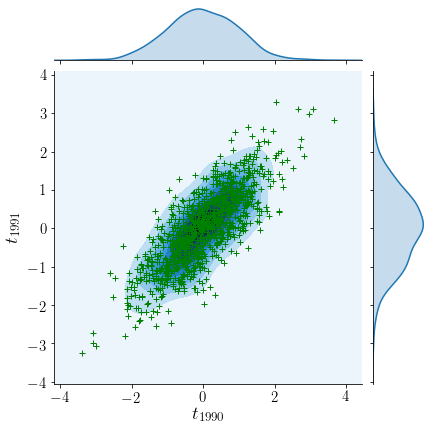

In [125]:



mean, cov = [0,0], [(1., 0.8), (0.8, 1.)]
data = np.random.multivariate_normal(mean, cov, 1000)
df = pd.DataFrame(data, columns=["x1", "x2"])
g = sns.jointplot("x1", "x2", data=df, kind="kde")

#(sns.jointplot("x1", "x2", data=df).plot_joint(sns.kdeplot))

g.plot_joint(plt.scatter, c="g", linewidth=1, marker="+")

#g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels(r"$t_{1990}$", r"$t_{1991}$", fontsize = 19);

#g.ax_joint.legend_.remove()

plt.savefig('/Users/anamaria/Desktop/jointprior1.pdf', format='pdf', dpi =200, bbox_inches='tight')
plt.show()

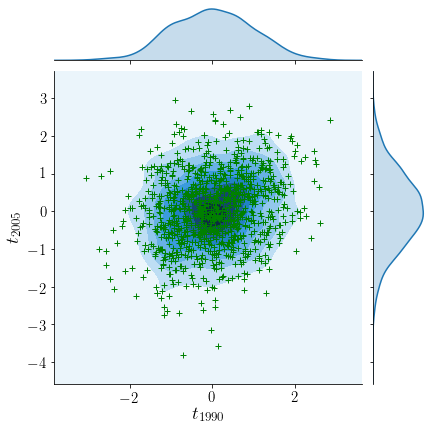

In [123]:
mean2, cov2 = [0,0], [(1., 0.2), (0.2, 1.)]
data2 = np.random.multivariate_normal(mean2, cov2, 1000)
df2 = pd.DataFrame(data2, columns=["x1", "x2"])
f = sns.jointplot("x1", "x2", data=df2, kind="kde")
#(sns.jointplot("x1", "x2", data=df).plot_joint(sns.kdeplot))


f.plot_joint(plt.scatter, c="g",  linewidth=1, marker="+")

#g.ax_joint.collections[0].set_alpha(0)
f.set_axis_labels(r"$t_{1990}$", r"$t_{2005}$", fontsize =19);

#g.ax_joint.legend_.remove()

plt.savefig('/Users/anamaria/Desktop/jointprior2.pdf', format='pdf', dpi =200, bbox_inches='tight')


Name : GP regression
Objective : -100.14336512806929
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |       2.241529013822993  |      +ve      |        
  rbf.lengthscale          |       34.74816692103314  |      +ve      |        
  Gaussian_noise.variance  |  2.5064482865610116e-05  |      +ve      |        


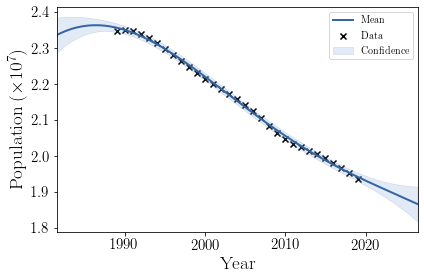

In [83]:
k = GPy.kern.RBF(input_dim=1, variance=2.2, lengthscale=34.7)
model_new = GPy.models.GPRegression(np.array(x)[:,None],np.array(y)[:,None]/10**7,k)
model_new.constrain_positive('')
model_new.optimize()
model_new.plot()
plt.xlabel('Year', fontsize = 19)
plt.ylabel(r'Population ($\times10^7$)', fontsize = 19)
print(model_new)
plt.savefig('/Users/anamaria/Desktop/population_gp_34.pdf',format = 'pdf', dpi=200, bbox_inches = 'tight')

## GP REGRESSION (LECTURE)

In [4]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as pl

""" This is code for simple GP regression. It assumes a zero mean GP Prior """


' This is code for simple GP regression. It assumes a zero mean GP Prior '

In [5]:
# This is the true unknown function we are trying to approximate
f = lambda x: np.sin(0.9*x).flatten()

In [6]:
# Define the kernel
def kernel(a, b):
    """ GP squared exponential kernel """
    kernelParameter = 0.1
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)


In [7]:
N = 10         # number of training points.
n = 50         # number of test points.
s = 0.00005    # noise variance.

In [8]:
# Sample some input points and noisy versions of the function evaluated at
# these points. 
X = np.random.uniform(-5, 5, size=(N,1))
y = f(X) + s*np.random.randn(N)

In [9]:
K = kernel(X, X)
L = np.linalg.cholesky(K + s*np.eye(N))

In [10]:
# points we're going to make predictions at.
Xtest = np.linspace(-5, 5, n).reshape(-1,1)


In [11]:
# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))
mu = np.dot(Lk.T, np.linalg.solve(L, y))


In [12]:
# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)

(-5.0, 5.0, -3.0, 3.0)

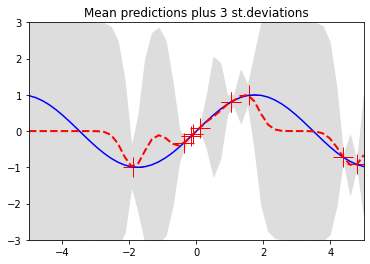

In [13]:
# PLOTS:
pl.figure(1)
pl.clf()
pl.plot(X, y, 'r+', ms=20)
pl.plot(Xtest, f(Xtest), 'b-')
pl.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.savefig('predictive.png', bbox_inches='tight')
pl.title('Mean predictions plus 3 st.deviations')
pl.axis([-5, 5, -3, 3])

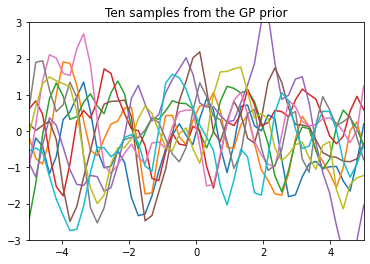

In [14]:
# draw samples from the prior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n))
f_prior = np.dot(L, np.random.normal(size=(n,10)))
pl.figure(2)
pl.clf()
pl.plot(Xtest, f_prior)
pl.title('Ten samples from the GP prior')
pl.axis([-5, 5, -3, 3])
pl.savefig('prior.png', bbox_inches='tight')


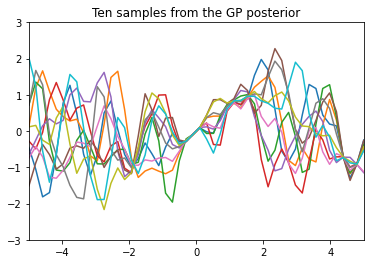

In [15]:
# draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,10)))
pl.figure(3)
pl.clf()
pl.plot(Xtest, f_post)
pl.title('Ten samples from the GP posterior')
pl.axis([-5, 5, -3, 3])
pl.savefig('post.png', bbox_inches='tight')

pl.show()